# Marketing Data Analysis


*by Nikita Rogozhnikov*

## Introduction

The purpose of this analysis is to focus on client segmentation and provide valuable business insights as well as a prediction model.

## Objectives

**Main objective #1** - determine customer groups based on their spending behavior and characteristics.

**Main objective #2** - create a model to predict total customers' spendings based on their characteristics.

**Minor objectives:**
- determine an average customer profile
- determine the most successful marketing campaign
- determine an average profile who accepted the last campaign
- identify spending patterns
- provide the store with business insights and recommendations

## Executive summary

During this analysis, two main customer groups were identified:

- The first group comprises individuals with low incomes who do not spend a significant amount on purchases.
- The second group is the target segment, consisting of high-income individuals with the highest average spending.

Based on the insights obtained, it is crucial to tailor the next campaign accordingly. The summarized recommendations are as follows:

- Since wine is the most popular product, promoting other products alongside wine may increase overall sales.
- Meat is commonly purchased via catalogues, making this channel an effective means for further promotions.
- Increasing awareness of the website among customers can lead to increased online purchases.
- As the target group likely does not have children, the campaign should not heavily focus on family-oriented aspects.
- Offering special promotions or rewards to loyal customers can encourage repeat purchases and improve purchasing frequency.

## Importing libraries and getting familiar with the dataset

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor


In [2]:
#import the dataset
df = pd.read_csv('_Projects/ifood_df.csv')

In [3]:
# show all the columns
pd.set_option('display.max_columns', None)

# show 5 rows
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [4]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [5]:
df.shape

(2205, 39)

In [6]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [7]:
df.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

## Data Adjustments

Before starting the analysis, it is necessary to adjust and delete some columns.\
A new column named 'Dependants' will be created as the sum of the 'Kidhome' and 'Teenhome' columns.\
Two additional columns, 'marital_incouple' and 'marital_alone', will be created based on several columns related to marital status.\
Please see below the final table.

In [8]:
# adjust/create some columns
df['Dependants'] = df['Kidhome']+df['Teenhome']
df['marital_incouple'] = df['marital_Married']+df['marital_Together']
df['marital_alone'] = df['marital_Divorced']+df['marital_Single']+df['marital_Widow']

In [9]:
df.drop(columns=['marital_Married','marital_Together','marital_Divorced','marital_Single','marital_Widow','Z_CostContact','Z_Revenue'], inplace=True)

In [10]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependants,marital_incouple,marital_alone
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,0,0,1,0,0,1529,1441,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,0,0,1,0,0,21,15,0,2,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,0,0,1,0,0,734,692,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,0,0,1,0,0,48,43,0,1,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,0,0,0,0,1,407,392,0,1,1,0


## Exploratory Data Analysis (EDA)

An important stage of this project is the exploratory data analysis or EDA.\
During this part, the data will be analyzed to uncover relevant insights or patterns in order to fulfill the set objectives.

#### Income distribution

According to the two plots below, the analyzed store primarily focuses on the middle class (or lower-middle based on the 2023 data).\
The evident 'borders' of this middle class are between $\$$30,000 and $\$$75,000.\
**The mean value of income is $\$$51,622**. (mean will be used for further analysis, it is added to the boxplot just for visual clarification)\
The largest number of purchases belongs to the group with approximately $\$$40,000.

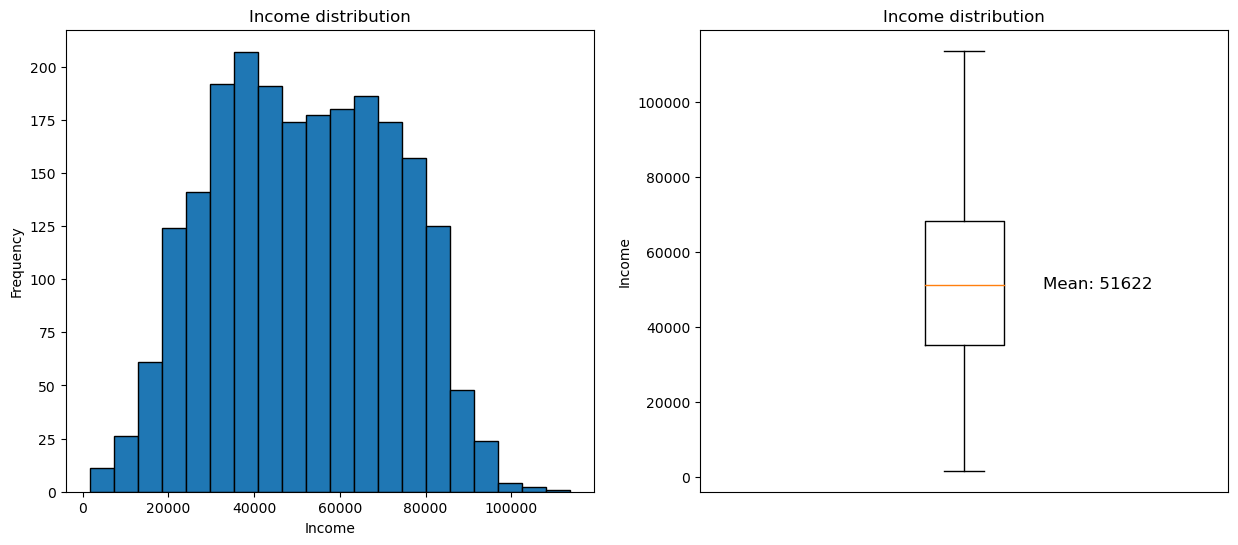

In [11]:
# check Income distribution
income_mean = df['Income'].mean()
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Income'], bins=20, edgecolor='black')
plt.title('Income distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend('', frameon=False)

plt.subplot(1, 2, 2)
plt.boxplot(df['Income'])
plt.title('Income distribution')
plt.ylabel('Income')
plt.xticks([])
plt.text(1.15, income_mean, f'Mean: {income_mean:.0f}', fontsize=12, va='center', ha='left')

plt.show()

#### Age distribution

According to the two plots below, the analyzed store primarily caters to middle-aged individuals.\
The evident 'borders' of this middle-aged class range from 38 years to 52 years.\
**The mean age is 51 years**.\
The age group with the greatest number of purchases is between 45 to 52 years.
 

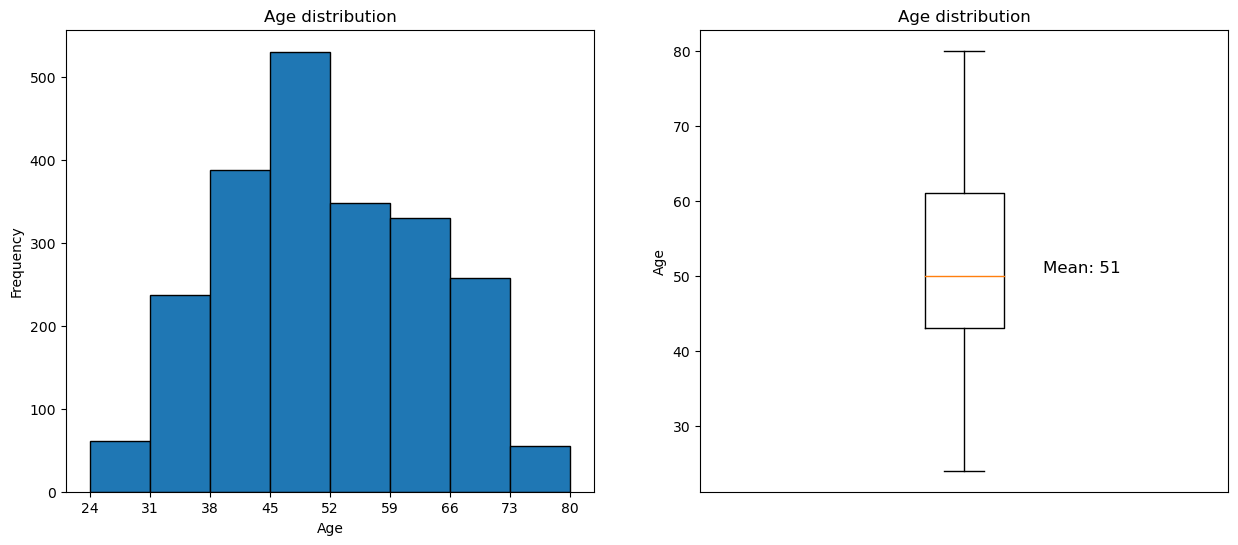

In [12]:
# check Age distribution
age_mean = df['Age'].mean()
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(df['Age'], bins=8, edgecolor='black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(bins)  
plt.legend('', frameon=False)

plt.subplot(1, 2, 2)
plt.boxplot(df['Age'])
plt.title('Age distribution')
plt.ylabel('Age')
plt.xticks([])
plt.text(1.15, age_mean, f'Mean: {age_mean:.0f}', fontsize=12, va='center', ha='left')

plt.show()

#### Customer days

The chart below illustrates the distribution of customer days.\
**The mean value is 2513 days**.\
However, the minimum and maximum values fall within the range of 2159 and 2858, respectively.\
This suggests that there have been no new customers for the past 2159 days, which is almost 6 years, indicating that the store is likely located in a small town.

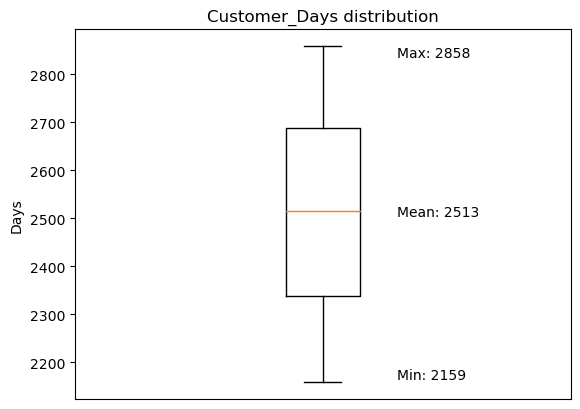

In [13]:
# plot customer_days
mean_days = df['Customer_Days'].mean()
max_days = df['Customer_Days'].max()
min_days = df['Customer_Days'].min()

plt.boxplot(df['Customer_Days'])
plt.title('Customer_Days distribution')
plt.ylabel('Days')
plt.xticks([])
plt.text(1.15, mean_days, f'Mean: {mean_days:.0f}', fontsize=10, va='center', ha='left')
plt.text(1.15, max_days, f'Max: {max_days:.0f}', fontsize=10, va='top', ha='left')
plt.text(1.15, min_days, f'Min: {min_days:.0f}', fontsize=10, va='bottom', ha='left')

plt.show()

#### Dependants / children

According to the plots below, the mean value of dependants is 0.95, indicating that customers are likely to **have a child**.\
Another significant group consists of customers without any dependants, but this group is almost half the size of the previous one.

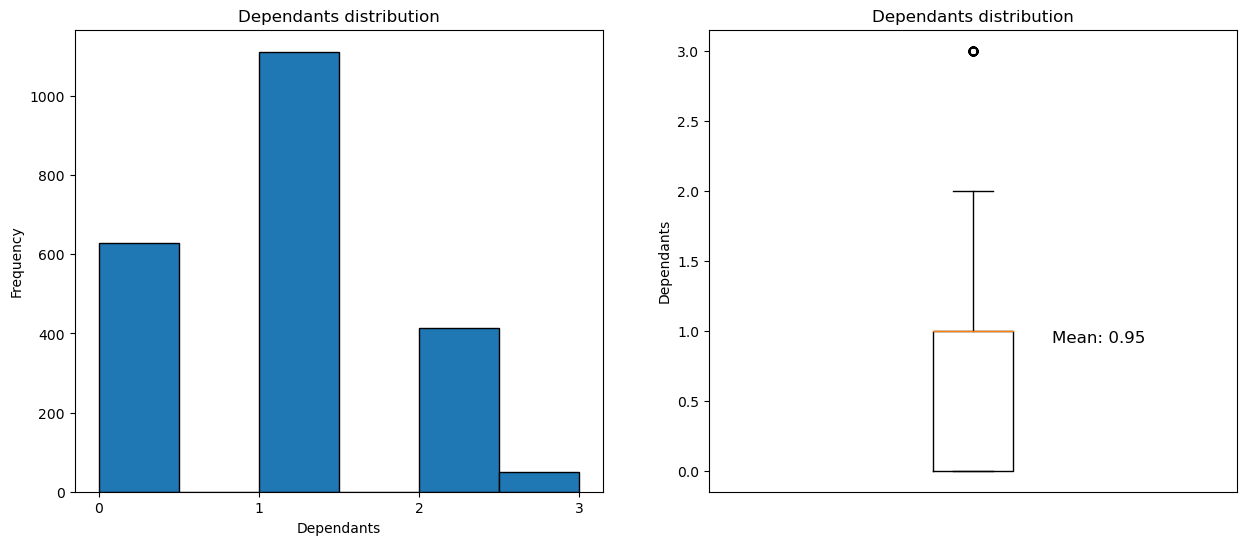

In [14]:
# check Dependants distribution
dep_mean = df['Dependants'].mean()
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(df['Dependants'], bins=6, edgecolor='black')
plt.title('Dependants distribution')
plt.xlabel('Dependants')
plt.ylabel('Frequency')
plt.xticks([0,1,2,3],[0,1,2,3])  # Set the x-axis ticks to bin edges
plt.legend('', frameon=False)

plt.subplot(1, 2, 2)
plt.boxplot(df['Dependants'])
plt.title('Dependants distribution')
plt.ylabel('Dependants')
plt.xticks([])
plt.text(1.15, dep_mean, f'Mean: {dep_mean:.2f}', fontsize=12, va='center', ha='left')

plt.show()

#### Marital status

**More than 60% of customers are in a couple**, which may potentially correlate with the number of dependants (to be analyzed in the further stage). \
This suggests that the primary consumer target is families.

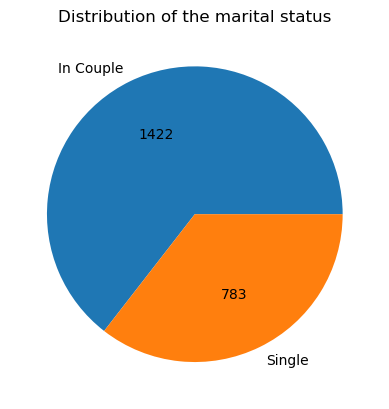

In [15]:
# check Dependants distribution
df_pie = df['marital_incouple'].value_counts()
df_pie.plot(kind='pie', labels=['In Couple','Single'],autopct=lambda p: '{:.0f}'.format(p * len(df['marital_incouple']) / 100))
plt.title('Distribution of the marital status')
plt.ylabel('')
plt.show()

#### Educational level

The pie chart below suggests that almost half of the customers are graduates.\
It is not possible to determine the precise level of education they hold without further details.\
However, for this analysis, it is evident that the targeted group consists of **educated individuals**, including graduates, masters, PhD holders, and those in the second cycle.

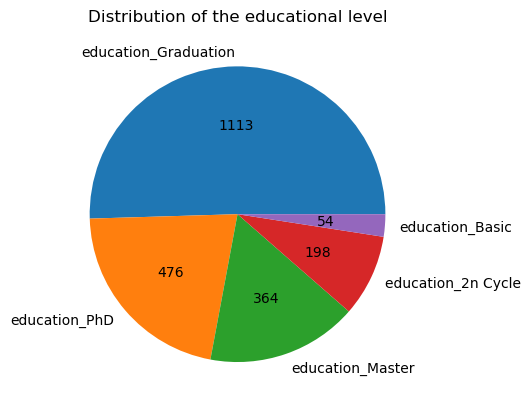

In [16]:
# plot the distribution of the educational level
ed_level = df[['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']].idxmax(axis=1).value_counts()

ed_level.plot(kind='pie',autopct=lambda p: '{:.0f}'.format(p * ed_level.sum() / 100))
plt.title('Distribution of the educational level')
plt.ylabel('')
plt.show()



#### Recency

According to the box plot below, **the mean value of the last purchase is 49 days**.\
This suggests that, on average, customers tend to buy from the store approximately once every two months.

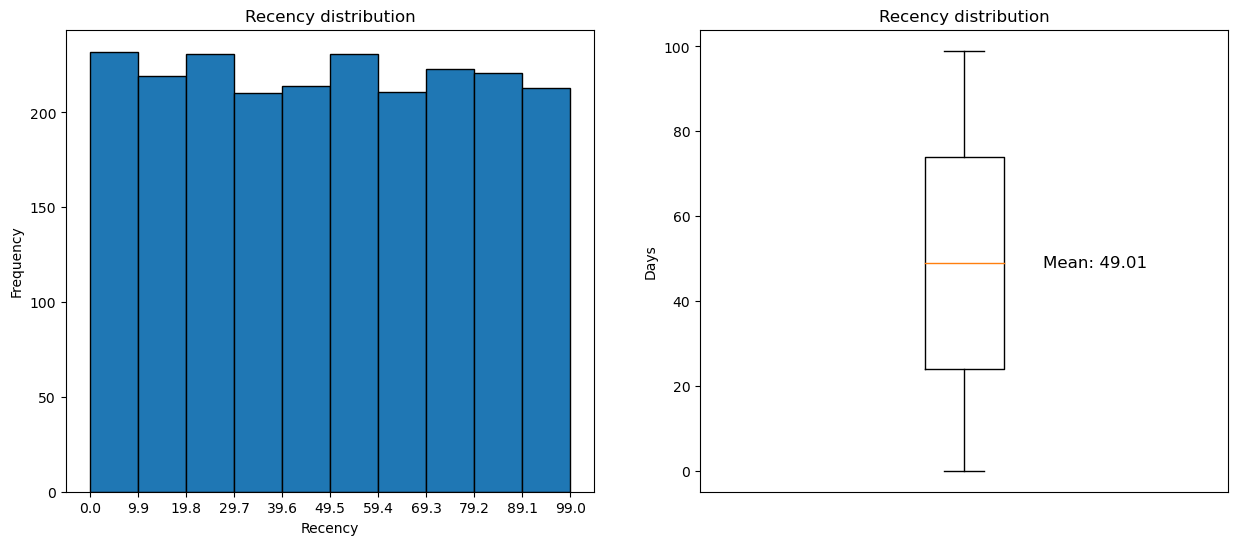

In [17]:
#plot the distribution of Recency
mean_recency = df['Recency'].mean()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(df['Recency'], bins=10, edgecolor='black')
plt.title('Recency distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.xticks(bins)  # Set the x-axis ticks to bin edges
plt.legend('', frameon=False)

plt.subplot(1, 2, 2)
plt.boxplot(df['Recency'])
plt.title('Recency distribution')
plt.ylabel('Days')
plt.xticks([])
plt.text(1.15, mean_recency, f'Mean: {mean_recency:.2f}', fontsize=12, va='center', ha='left')

plt.show()

#### Spendings

**The mean value of spednings is $\$$562**.\
There are several exceptions of over $\$$2000.\
However, according to the histogram, most customers tend to spend less than $\$$100.

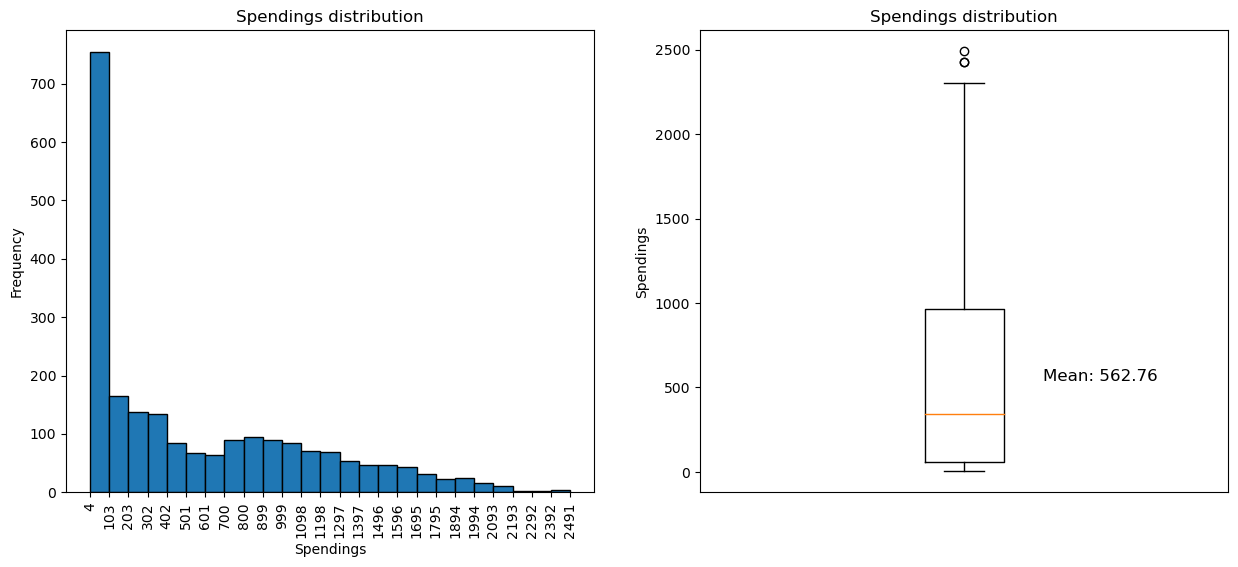

In [18]:
# check Spendings distribution
spn_mean = df['MntTotal'].mean()
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
hist, bins, _ = plt.hist(df['MntTotal'], bins=25, edgecolor='black')
plt.title('Spendings distribution')
plt.xlabel('Spendings')
plt.ylabel('Frequency')
plt.xticks(bins, rotation = 90)
plt.legend('', frameon=False)

plt.subplot(1, 2, 2)
plt.boxplot(df['MntTotal'])
plt.title('Spendings distribution')
plt.ylabel('Spendings')
plt.xticks([])
plt.text(1.15, spn_mean, f'Mean: {spn_mean:.2f}', fontsize=12, va='center', ha='left')

plt.show()

#### Spendings by good

The pie chart below represents a breakdown of the average spending by goods.\
It is evident that **wine** accounts for more than half of the spending ($\$$306) followed by **meat** ($\$$165).

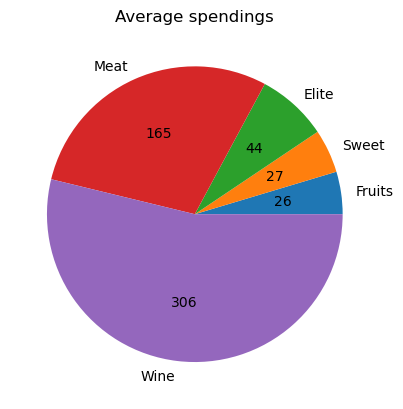

In [19]:
#plot the average spending by product
products = {'Wine':df['MntWines'].mean(),
            'Fruits':df['MntFruits'].mean(),
            'Meat':df['MntMeatProducts'].mean(),
            'Sweet':df['MntSweetProducts'].mean(),
            'Elite':df['MntGoldProds'].mean()}
df_products = pd.DataFrame(products, index=['Mean values']).transpose().sort_values(by='Mean values')

ax = df_products.plot.pie(y='Mean values', autopct=lambda p: '{:.0f}'.format(p * df_products['Mean values'].sum() / 100), labels=df_products.index, textprops={'fontsize': 10})
ax.set_title('Average spendings')
plt.ylabel('')
plt.legend('', frameon=False)
plt.show()

#### Purchase places

According to the pie chart below, **customers tend to buy more frequently in the store** (more than 60%) rather than on the website or through the catalogue.\
However, the website may potentially be an open niche for further development as it represents approximately 30% of the total purchases.

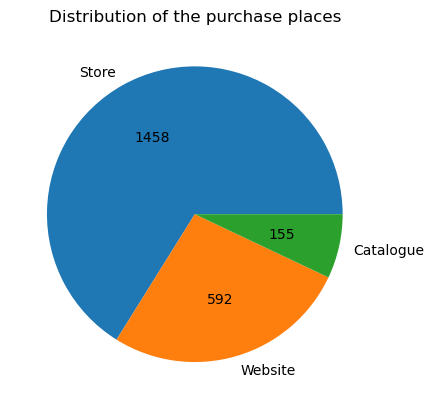

In [20]:
# plot the distribution of purchasing places
purchase_place = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].idxmax(axis=1).value_counts()

purchase_place.plot(kind='pie',labels=['Store','Website','Catalogue'],autopct=lambda p: '{:.0f}'.format(p * purchase_place.sum() / 100))
plt.title('Distribution of the purchase places')
plt.ylabel('')
plt.show()


### Average client's profile

According to the Exploratory Data Analysis (EDA), **the average client's profile** is the following:

- Yearly income: $\$$51,622
- Age: 51
- Marital status: In couple
- Has 1 child
- Educational level: Graduated
- Has been a customer for 2,513 days (approx. 7 years)
- Buys in store
- Purchases every 49 days
- The average spending: $\$$512
    - The greatest average spending is on wine: $\$$306
    - Followed by meat: $\$$165


### Marketing campaigns evaluation

The last campaign was the most successful with the greatest number of responses (333 or 15.1%).\
It has more than doubled in comparison to the fifth one (161 or 7.3%).\
The worst campaign, therefore, was the second one with 30 responses only (1.4%).

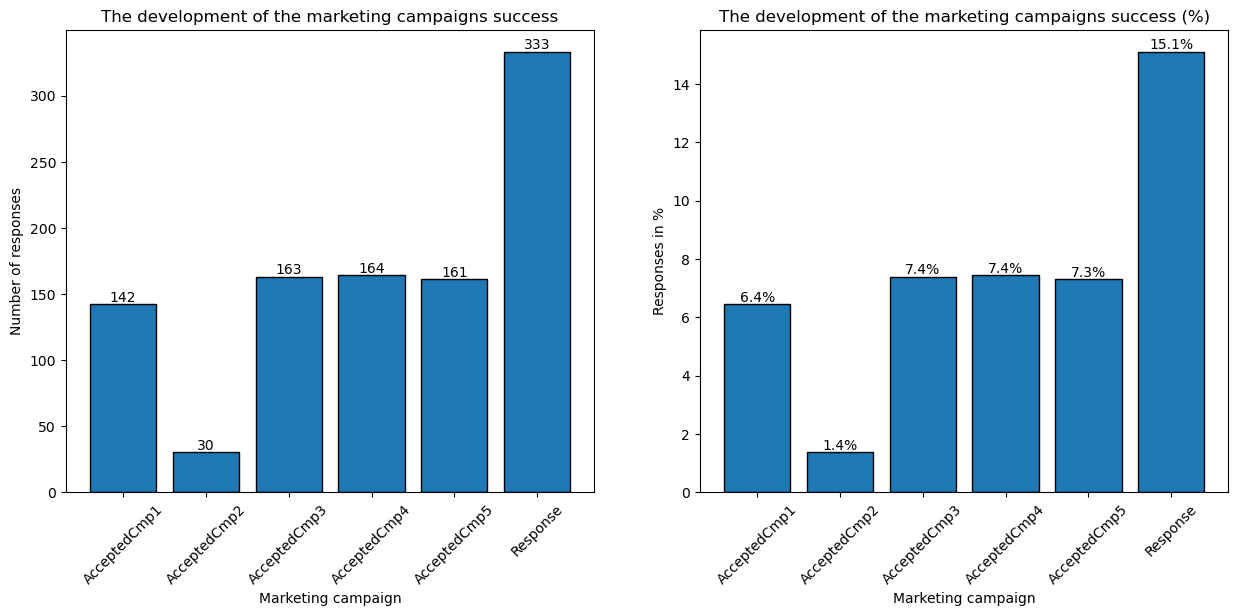

In [21]:
#determing the most successful marketing campaign
success = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'Response']].sum()
mrkt_cmpn = pd.DataFrame(success).rename(columns={0: 'Success'})
mrkt_cmpn['Success%'] = (mrkt_cmpn / len(df['Response']))*100

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.bar(mrkt_cmpn.index, mrkt_cmpn['Success'], edgecolor='black')
plt.title('The development of the marketing campaigns success')
plt.xlabel('Marketing campaign')
plt.ylabel('Number of responses')
plt.xticks(rotation=45)
plt.legend('', frameon=False)
for i, v in enumerate(mrkt_cmpn['Success']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
plt.bar(mrkt_cmpn.index, mrkt_cmpn['Success%'], edgecolor='black')
plt.title('The development of the marketing campaigns success (%)')
plt.xlabel('Marketing campaign')
plt.ylabel('Responses in %')
plt.xticks(rotation=45)
plt.legend('', frameon=False)
for index, row in mrkt_cmpn.iterrows():
    v = row['Success%']
    plt.text(index, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)
plt.show()

#### The most successful campaign - responsed group's profile

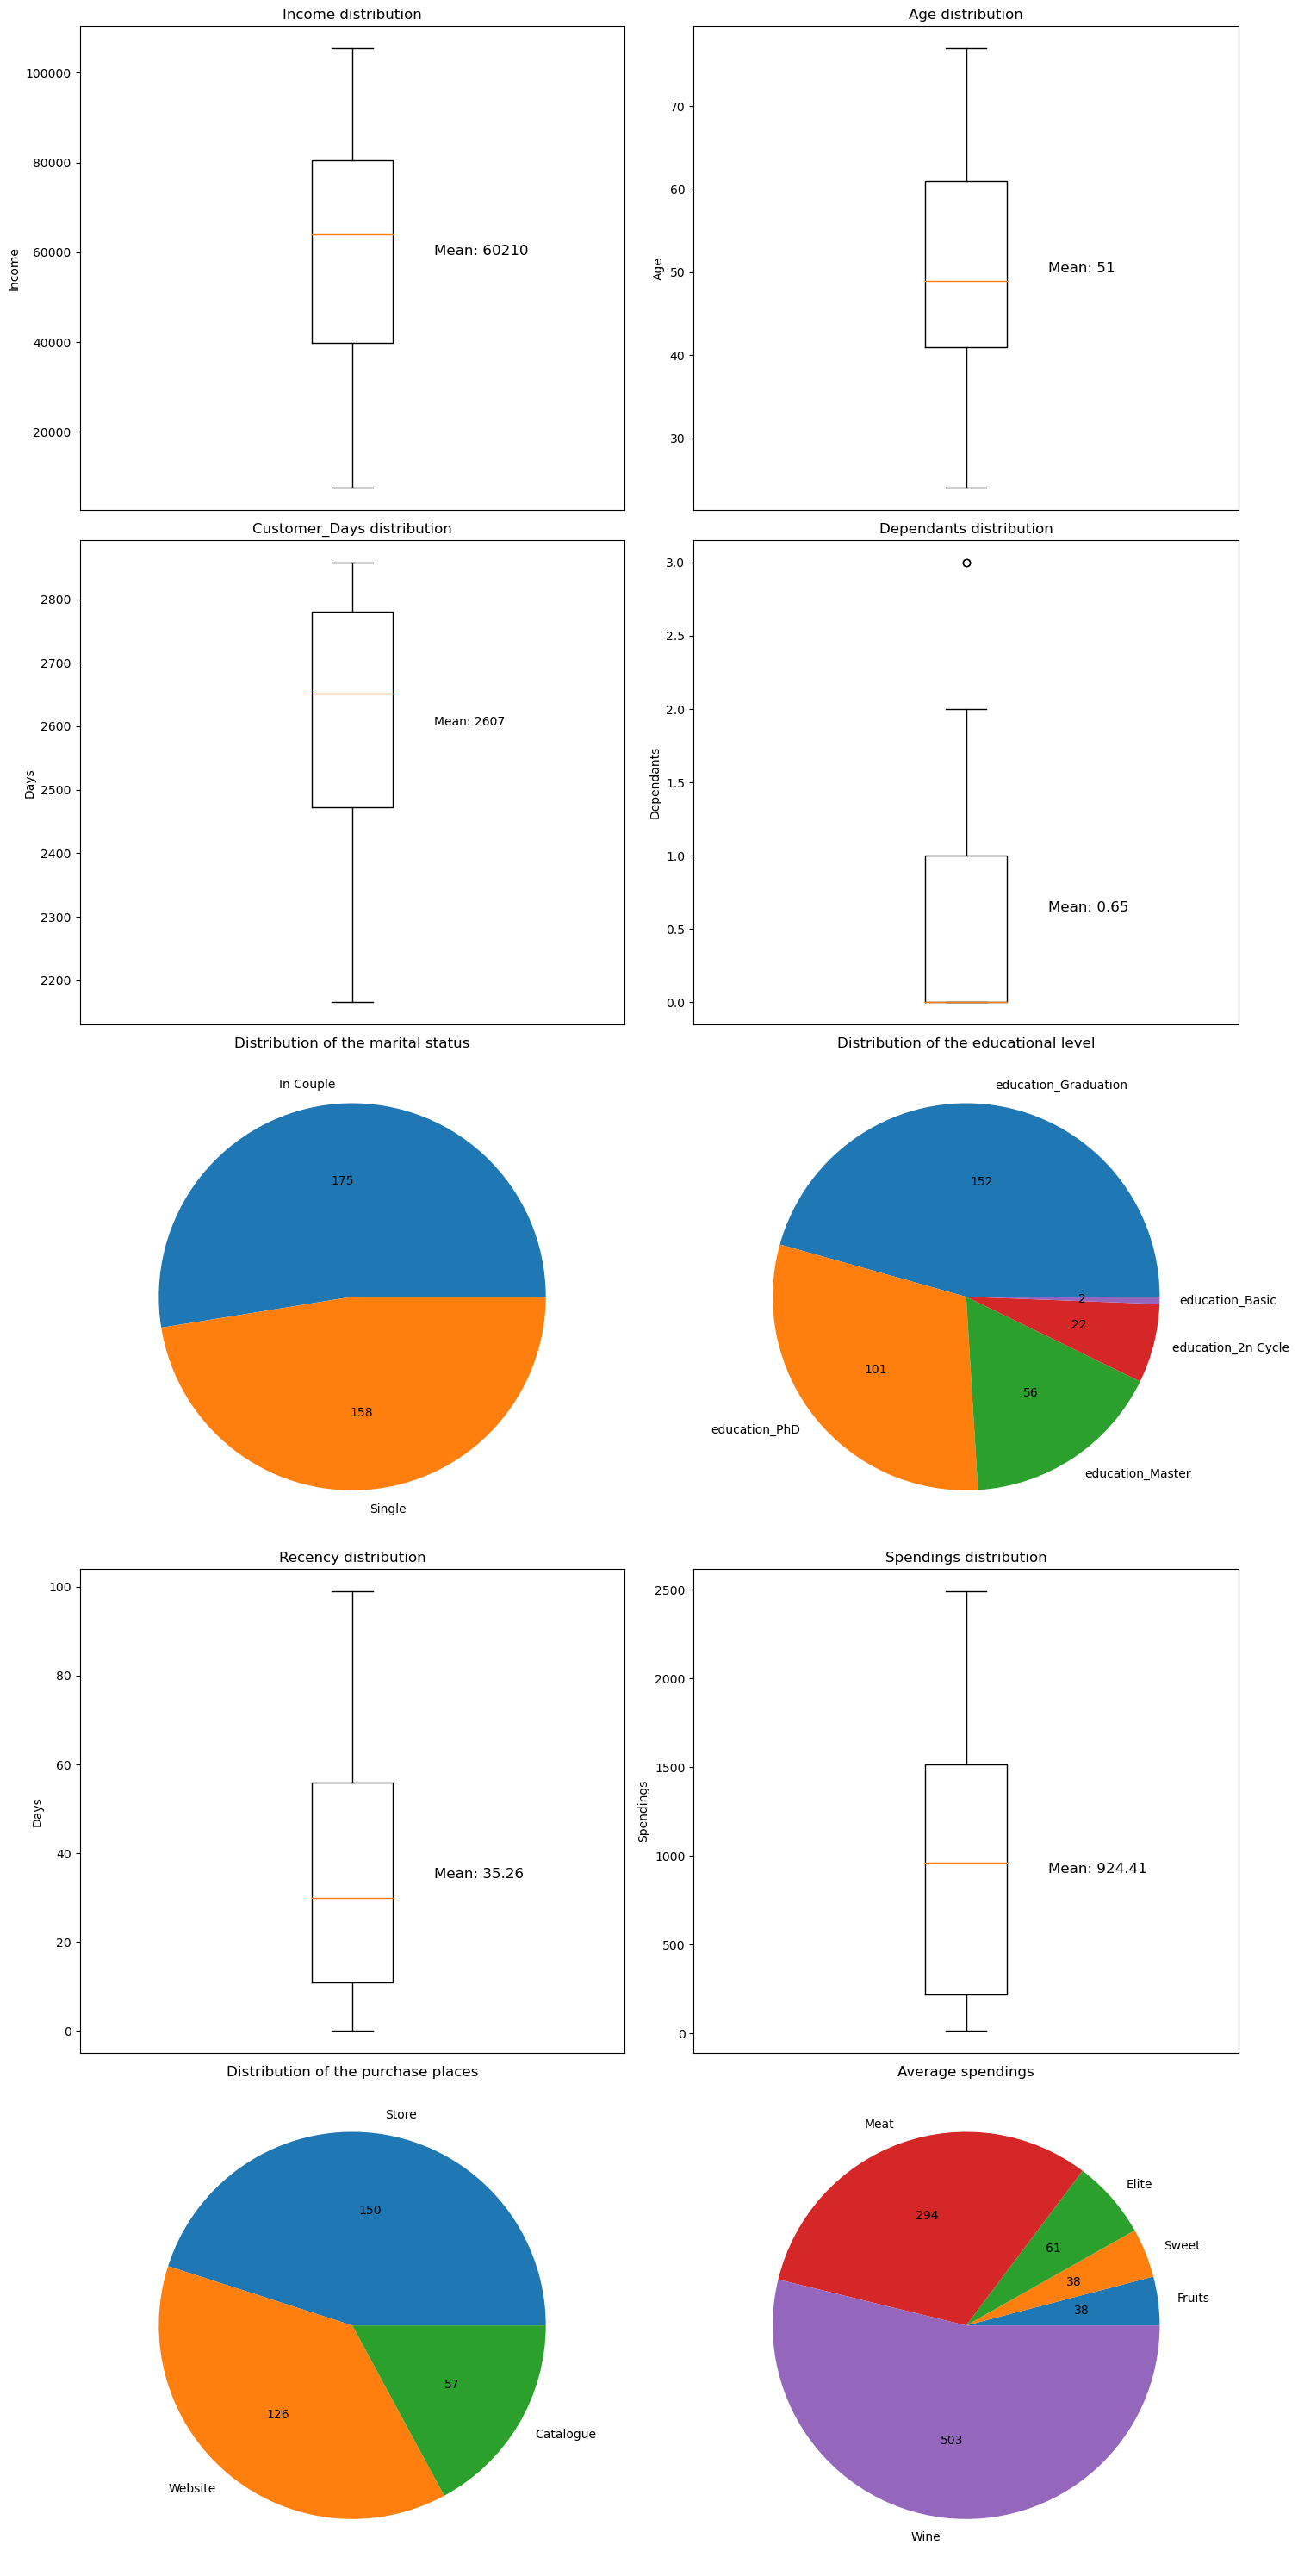

In [22]:
# Create a new DataFrame where Response for the last campaign is positive
df_response = df[df['Response'] == 1]

# Calculate mean values
income_mean1 = df_response['Income'].mean()
age_mean1 = df_response['Age'].mean()
mean_days1 = df_response['Customer_Days'].mean()
dep_mean1 = df_response['Dependants'].mean()
mean_recency1 = df_response['Recency'].mean()
spn_mean1 = df_response['MntTotal'].mean()

# Settings for spendings by good
products1 = {
    'Wine': df_response['MntWines'].mean(),
    'Fruits': df_response['MntFruits'].mean(),
    'Meat': df_response['MntMeatProducts'].mean(),
    'Sweet': df_response['MntSweetProducts'].mean(),
    'Elite': df_response['MntGoldProds'].mean()
}
df_products1 = pd.DataFrame(products1, index=['Mean values']).transpose().sort_values(by='Mean values')

# Setting for purchase places
purchase_place1 = df_response[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1).value_counts()

# Plot
plt.figure(figsize=(15, 30))

# Income
plt.subplot(5, 2, 1)
plt.boxplot(df_response['Income'])
plt.title('Income distribution')
plt.ylabel('Income')
plt.xticks([])
plt.text(1.15, income_mean1, f'Mean: {income_mean1:.0f}', fontsize=12, va='center', ha='left')

# Age
plt.subplot(5, 2, 2)
plt.boxplot(df_response['Age'])
plt.title('Age distribution')
plt.ylabel('Age')
plt.xticks([])
plt.text(1.15, age_mean1, f'Mean: {age_mean1:.0f}', fontsize=12, va='center', ha='left')

# Customer_Days
plt.subplot(5, 2, 3)
plt.boxplot(df_response['Customer_Days'])
plt.title('Customer_Days distribution')
plt.ylabel('Days')
plt.xticks([])
plt.text(1.15, mean_days1, f'Mean: {mean_days1:.0f}', fontsize=10, va='center', ha='left')

# Dependants
plt.subplot(5, 2, 4)
plt.boxplot(df_response['Dependants'])
plt.title('Dependants distribution')
plt.ylabel('Dependants')
plt.xticks([])
plt.text(1.15, dep_mean1, f'Mean: {dep_mean1:.2f}', fontsize=12, va='center', ha='left')

# Marital status
plt.subplot(5, 2, 5)
df_pie1 = df_response['marital_incouple'].value_counts()
df_pie1.plot(kind='pie', labels=['In Couple', 'Single'], autopct=lambda p: '{:.0f}'.format(p * len(df_response['marital_incouple']) / 100))
plt.title('Distribution of the marital status')
plt.ylabel('')

# Educational level
plt.subplot(5, 2, 6)
ed_level1 = df_response[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].idxmax(axis=1).value_counts()
ed_level1.plot(kind='pie', autopct=lambda p: '{:.0f}'.format(p * ed_level1.sum() / 100))
plt.title('Distribution of the educational level')
plt.ylabel('')

# Recency
plt.subplot(5, 2, 7)
plt.boxplot(df_response['Recency'])
plt.title('Recency distribution')
plt.ylabel('Days')
plt.xticks([])
plt.text(1.15, mean_recency1, f'Mean: {mean_recency1:.2f}', fontsize=12, va='center', ha='left')

# Spendings
plt.subplot(5, 2, 8)
plt.boxplot(df_response['MntTotal'])
plt.title('Spendings distribution')
plt.ylabel('Spendings')
plt.xticks([])
plt.text(1.15, spn_mean1, f'Mean: {spn_mean1:.2f}', fontsize=12, va='center', ha='left')

# Purchase places
plt.subplot(5, 2, 9)
purchase_place1.plot(kind='pie', labels=['Store', 'Website', 'Catalogue'], autopct=lambda p: '{:.0f}'.format(p * purchase_place1.sum() / 100))
plt.title('Distribution of the purchase places')
plt.ylabel('')

# Spendings by good
plt.subplot(5, 2, 10)
plt.pie(df_products1['Mean values'], labels=df_products1.index, autopct=lambda p: '{:.0f}'.format(p * df_products1['Mean values'].sum() / 100), textprops={'fontsize': 10})
plt.title('Average spendings')
plt.ylabel('')
plt.legend('', frameon=False)


plt.tight_layout()  # Adjust spacing between subplots
plt.show()


According to the plots above, the average client's profile with a successful response in the last campaign is as follows:

- Yearly income: 60,210\$
- Age: 51
- Marital status: In couple or Single
- Has 1 child (mean) or no child (median)
- Educational level: Graduated
- Has been a customer for 2,607 days (approx. 7 years)
- Buys in store and online
- Purchases every 35 days
- The average spending: 924\$
    - The greatest average spending is on wine: 503\$
    - Followed by meat: 294\$

### Profiles comparison and business insights

The table below presents a comparison of insights between the two profiles.\
For simplicity, the average client's profile is referred to as the 'Main profile,' while the average client's profile with a positive response in the last campaign is referred to as the 'Response profile'.

|             |Main profile|Response profile|Comment|
|:------------|:----------|:---------|:-----------------------------------------------------------------------------------------------------------------------------|
|Yearly income|$\$$51,622 |$\$$60,210|There is no significant variance between the two profiles, but the response profile shows a slightly higher yearly income|
|Age|51|51|The results are identical|
|Marital Status|In Couple|In Couple OR Single|An interesting insight here is that the response profile has an almost 50/50 distribution between individuals in a couple and single individuals. It suggests that the store may benefit from focusing on single individuals in the next campaign, as the response ratio is much higher compared to those in a couple| 
|Dependants|1|1 OR 0|The response profile has two values because the mean is 0.65, possibly influenced by customers with many children (2 or 3). However, the median result is 0, suggesting that most customers have no children. This insight supports the previous one, indicating that the store can target single individuals|
|Educational level|Graduated|Graduated|The results are more or less identical, with the target group being educated individuals.|
|Has been a customer for|2,513 days|2,607 days| The results are more or less identical|
|Purchase place|Store|Store OR Website|Even though in-store purchases are still leading, the proportion of website usage has significantly increased compared to the main profile. It supports the idea that the store can focus on the online niche|
|Recency|Once in 49 days| Once in 35 days|The response profile makes purchases slightly more often than the main one. The store can consider offering benefits in the next campaign to customers who buy more frequently|
|Average spending|$\$$512|$\$$924|This indicator supports the fact that the response profile may be more loyal to the store as it tends to spend more than the main profile|
|The most purchased good|Wine|Wine|Undoubtedly, wine is the leader in sales, indicating that the store should consider adapting its next campaign to either focus on this item to further boost sales or to promote the items with lower sales to increase their popularity|

## Statistical analysis

In [23]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Dependants,marital_incouple,marital_alone
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2822,0,0,1,0,0,1529,1441,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2272,0,0,1,0,0,21,15,0,2,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2471,0,0,1,0,0,734,692,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2298,0,0,1,0,0,48,43,0,1,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2320,0,0,0,0,1,407,392,0,1,1,0


### Correlation

According to the heatmap below, the interesting insights from the correlation analysis can be found in the following table. Only relatively strong correlations have been used. Some irrelevant columns were dropped (e.g., the correlation of Kidhome with Dependants).

|Column|Postive correlation|Negative correlation|
|:-----|:------------------|:-------------------|
|Income|&bull; Amounts spent on all types of goods<br> &bull; Numbers of web, catalogue and in-store purchases<br>|&bull; Kidhome<br> &bull; Number of website visits<br>|
|Kidhome|Number of website visits|&bull; Amounts spent on all types of goods<br> &bull; Numbers of web, catalogue and in-store purchases<br>|
|Teenhome|&bull; Age<br> &bull; Number of deals <br>|None|
|Wine|&bull; The strongest correlation is with meat<br> &bull; Weaker correlation with other goods <br> &bull; Strong correlation with numbers of catalogue and in-store purchases|Kidhome|
|Fruits|&bull; The strongest correlation is with meat, fish and sweet products<br> &bull; Weaker correlation with other goods<br>|None|
|Meat|&bull; Relatively strong correlation with all types of goods <br> &bull; Strong correlation with numbers of catalogue purchases <br>|Number of website visits|
|Fish|Relatively strong correlation with all types of goods except wine|Number of website visits|


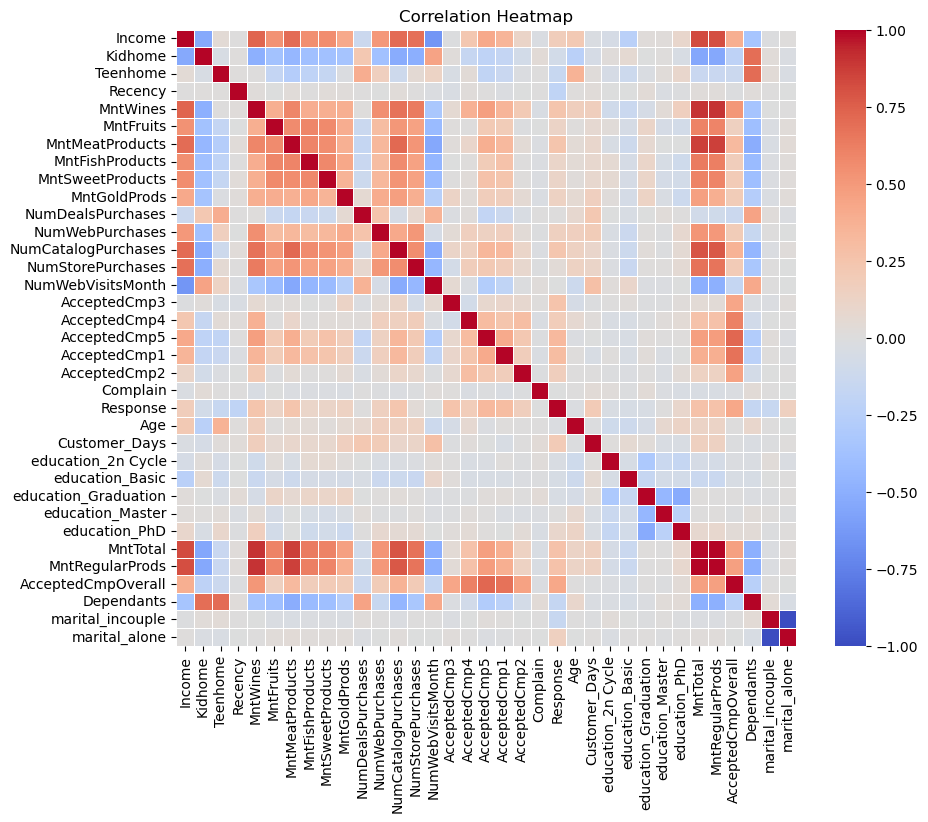

In [24]:
# plot a correlation heat map
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

A linear regression is used to analyze the correlation between income and the amounts spent on all types of goods. There is a relatively strong correlation with a correlation coefficient of 0.82. However, it is evident that a polynomial regression with a 2nd-degree (quadratic) would be a better choice. Nonetheless, the linear regression is still used for visualization purposes, as there will be no further prediction required.

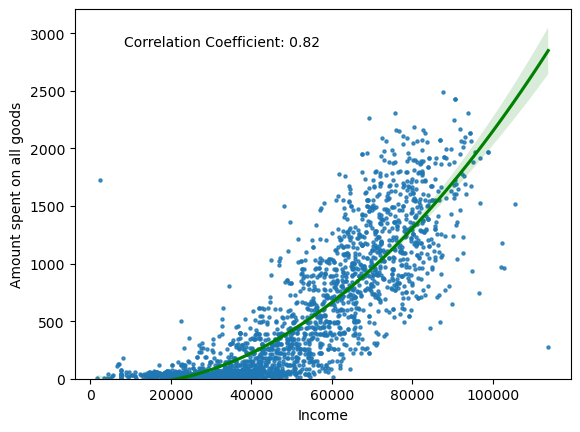

In [25]:
data_corr = df[['Income','MntTotal']]
corr_coeff, _ = pearsonr(data_corr['Income'], data_corr['MntTotal'])
corr_coeff = round(corr_coeff, 2)

sns.regplot(x='Income',y='MntTotal',data=data_corr, scatter_kws={'s': 5}, order=2, line_kws={'color': 'green'})
plt.ylabel('Amount spent on all goods')
plt.ylim(0,)
plt.text(0.1, 0.9, f'Correlation Coefficient: {corr_coeff}', transform=plt.gca().transAxes, fontsize=10)
plt.show()

The correlation between wine and meat is also further analyzed using a linear regression. The strength of this correlation is lower than the correlation between Income and Amount spent on all goods, with a correlation coefficient of 0.59. However, it still indicates a relatively significant chance that wine is bought together with meat products.

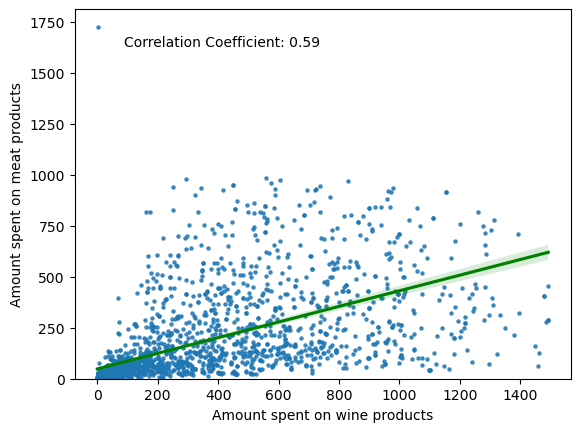

In [26]:
data_corr = df[['MntWines','MntMeatProducts']]
corr_coeff, _ = pearsonr(data_corr['MntWines'], data_corr['MntMeatProducts'])
corr_coeff = round(corr_coeff, 2)

sns.regplot(x='MntWines',y='MntMeatProducts',data=data_corr, scatter_kws={'s': 5}, line_kws={'color': 'green'})
plt.xlabel('Amount spent on wine products')
plt.ylabel('Amount spent on meat products')
plt.ylim(0,)
plt.text(0.1, 0.9, f'Correlation Coefficient: {corr_coeff}', transform=plt.gca().transAxes, fontsize=10)
plt.show()

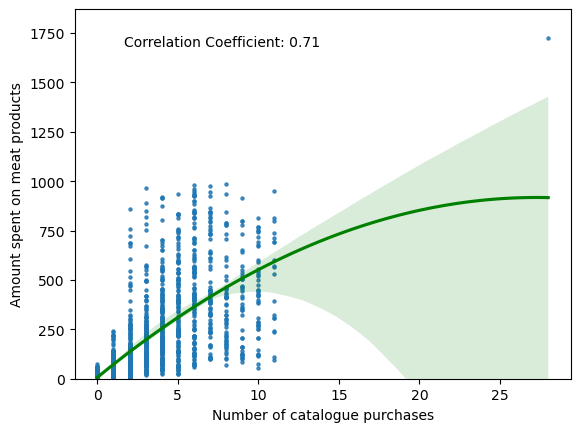

In [27]:
data_corr = df[['NumCatalogPurchases','MntMeatProducts']]
corr_coeff, _ = pearsonr(data_corr['NumCatalogPurchases'], data_corr['MntMeatProducts'])
corr_coeff = round(corr_coeff, 2)

sns.regplot(x='NumCatalogPurchases',y='MntMeatProducts',data=data_corr, scatter_kws={'s': 5}, order=2, line_kws={'color': 'green'})
plt.xlabel('Number of catalogue purchases')
plt.ylabel('Amount spent on meat products')
plt.ylim(0,)
plt.text(0.1, 0.9, f'Correlation Coefficient: {corr_coeff}', transform=plt.gca().transAxes, fontsize=10)
plt.show()

#### Conclusion of the correlation analysis

- There is a positive correlation between income and the amounts spent on goods, indicating that higher income individuals tend to spend more.
- Individuals with dependents (Kidhome) tend to spend less, suggesting that having dependents may impact spending behavior.
- Wine is likely to be bought with meat, as there is a positive correlation between them.
- Wine is popularly purchased through all channels - in-store, website, and catalogue.
- There is a tendency for customers to buy fruits, meat, fish, and sweet products together, as they show a positive correlation.
- Meat is likely to be bought using a catalogue, suggesting that catalogues play a role in promoting meat products.
- No significant dependence is observed between any column and the educational level, indicating that education level may not have a strong influence on spending behavior 

### Clients' segmentation

According to the correlation analysis, Income is the most significant parameter with the greatest impact on the total spending. Due to this fact, the clients' segmentation will not be done in a standard way. Instead, it will be divided into several steps:
- Determining K-means based on Income only.
- Determining K-means based on the other parameters except Income.

#### K-means based on Income only

The first step is to determine an optimal K by visualization of the elbow point. In this case, it is 3.

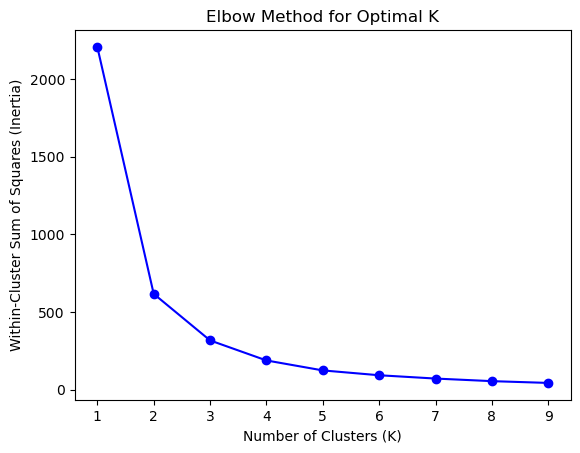

In [28]:
data_income = df[['Income']]
data_income = data_income.values
X = StandardScaler().fit_transform(data_income)

inertias = []
K_range = range(1, 10)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)  
    inertias.append(kmeans.inertia_)
    
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

The second step is to prepare a K-mean model with the K equals to 3 and to add the labels into the original dataset.

In [29]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X) 
labels = kmeans.labels_
df['Kmean Income']=labels

The third step is to visualize the distribution and to determine the average values of Income for each group.
It is evident that the average value of Income for each group is as follows:
- 0 = $\$$27,931
- 1 = $\$$75,482
- 2 = $\$$51,403

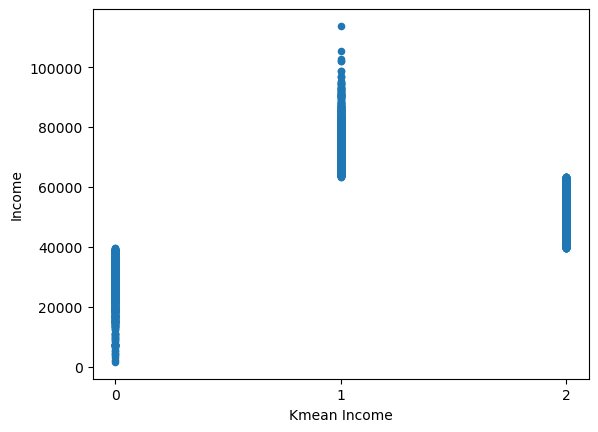

In [30]:
df_income = df[['Income','Kmean Income']]
df_income.plot(kind='scatter', x='Kmean Income', y='Income')
plt.xticks([0,1,2])
plt.show()

In [31]:
mean_income_by_group = df_income.groupby('Kmean Income')['Income'].mean()

print(mean_income_by_group)

Kmean Income
0    27931.125874
1    75482.585774
2    51403.557568
Name: Income, dtype: float64


#### K-means based on the other parameters

According to the correlation analysis, the educational level did not show a strong impact on the spending behavior. Therefore, all these columns will be merged into one, indicating whether an individual is educated (Graduated, Master, PhD, 2nd cycle) or not (Basic).

In [32]:
def map_education(row):
    educated = row['education_2n Cycle'] or row['education_Graduation'] or row['education_Master'] or row['education_PhD']
    non_educated = row['education_Basic']
    if educated:
        return 1
    elif non_educated:
        return 0
    else:
        return None

df['Educated'] = df.apply(map_education, axis=1)

df.drop(columns=['education_2n Cycle', 'education_Graduation', 'education_Master', 'education_PhD', 'education_Basic'], inplace=True)

Same operation is performed with the columns 'marital_incouple' and 'marital_alone'.

In [33]:
def map_incouple(row):
    incouple = row['marital_incouple']
    alone = row['marital_alone']
    if incouple:
        return 1
    elif alone:
        return 0
    else:
        return None

df['In-couple'] = df.apply(map_incouple, axis=1)
df.drop(columns=['marital_incouple', 'marital_alone'], inplace=True)

Creating a supporting dataset with the other parameters.
There is no need to include the impact of responses to different marketing campaigns as well as the total amounts spent.

In [34]:
df_other = df.drop(columns=['Income','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',\
                            'AcceptedCmp1','AcceptedCmp2','Response','MntTotal','MntRegularProds','AcceptedCmpOverall','Kmean Income','Customer_Days'])

Determining of X.

In [35]:
df_other = df_other.values
X = StandardScaler().fit_transform(df_other)

Determining of an optimal K using the elbow method. In this case, it is 4.
The decrease between 6 and 7 is, therefore, not taken into consideration.

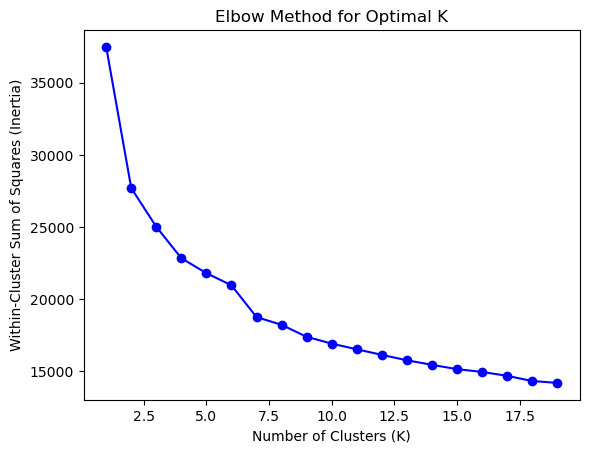

In [36]:
inertias = []
K_range = range(1, 20)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)  
    inertias.append(kmeans.inertia_)
    
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(X) 
labels = kmeans.labels_
df['Kmean Other']=labels

#### Merging the results

In [38]:
df['Groups'] = df['Kmean Income'].astype(str) + '.' + df['Kmean Other'].astype(str)
df.drop(columns=['Kmean Income', 'Kmean Other'], inplace=True)

group_counts = df['Groups'].value_counts()
df['Group_Count'] = df['Groups'].map(group_counts)

In [39]:
grouped_df = df.groupby('Groups').mean()
grouped_df.drop(columns=['Kidhome','Teenhome','MntRegularProds'], inplace=True)
grouped_df

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,MntTotal,AcceptedCmpOverall,Dependants,Educated,In-couple,Group_Count
Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,20306.259259,48.444444,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333,1.796296,1.888889,0.481481,2.851852,6.870370,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,42.537037,2587.203704,58.962963,0.111111,0.722222,0.0,0.629630,54.0
0.1,26349.000000,53.500000,62.500000,75.750000,512.250000,111.250000,25.000000,35.500000,5.000000,3.750000,8.750000,5.750000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,48.000000,2751.500000,786.750000,0.000000,0.250000,1.0,0.750000,4.0
0.2,33090.470588,44.352941,151.470588,18.235294,105.588235,35.882353,24.441176,79.970588,4.558824,6.794118,1.676471,5.176471,7.205882,0.088235,0.000000,0.000000,0.000000,0.000000,0.029412,0.323529,52.558824,2695.676471,335.617647,0.088235,1.029412,1.0,0.647059,34.0
0.3,28320.617978,48.470305,24.314607,4.207063,18.439807,6.219904,4.319422,13.380417,2.025682,1.871589,0.412520,2.948636,6.910112,0.081862,0.004815,0.000000,0.001605,0.000000,0.014446,0.107544,46.837881,2493.269663,57.500803,0.088283,1.168539,1.0,0.656501,623.0
1.1,77717.092885,49.569170,619.673913,68.335968,466.826087,100.158103,72.162055,76.577075,1.140316,5.094862,6.023715,8.470356,2.579051,0.079051,0.112648,0.274704,0.223320,0.027668,0.005929,0.284585,51.741107,2502.703557,1327.156126,0.717391,0.177866,1.0,0.626482,506.0
1.2,70251.020619,48.144330,670.634021,29.190722,199.386598,37.046392,29.922680,59.989691,3.046392,6.835052,3.804124,8.768041,5.221649,0.056701,0.206186,0.092784,0.082474,0.025773,0.010309,0.128866,55.180412,2514.164948,966.180412,0.463918,1.185567,1.0,0.675258,194.0
1.3,68674.529412,43.882353,166.176471,16.882353,78.117647,22.294118,13.058824,25.588235,1.529412,3.764706,1.588235,5.764706,3.235294,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,49.823529,2389.352941,296.529412,0.058824,1.176471,1.0,0.647059,17.0
2.1,57697.088235,49.617647,407.191176,78.661765,283.352941,109.029412,68.955882,86.573529,2.117647,5.705882,4.926471,8.779412,4.352941,0.088235,0.102941,0.000000,0.029412,0.029412,0.000000,0.176471,51.485294,2583.558824,947.191176,0.250000,0.455882,1.0,0.500000,68.0
2.2,53998.147399,47.728324,432.789017,17.650289,114.630058,24.078035,17.997110,61.997110,4.271676,6.430636,2.910405,7.462428,6.202312,0.080925,0.124277,0.008671,0.028902,0.020231,0.008671,0.138728,55.300578,2592.236994,607.144509,0.263006,1.179191,1.0,0.658960,346.0


According to the table above, there are 5 evident clusters of sub-targeted groups. The profiles with recommendations are, therefore, shown in the following table:

|Group|Income &nbsp;&nbsp;&nbsp;|Age|Dependents|Marital Status|Spending Behavior|Purchase Places|Total Average Spending|Last Campaign Acceptance|Size (% out of Total)|Recommendation|
|:----|:------|:--|:---------|:-------------|:------------------------|:------------------------|:---------------------|:---------------------------|:----|:-------------|
|0.3|$\$$28,320|48|1.16|In-couple or Single|Does not buy too many goods|Visits the website a lot, but also makes in-store purchases|$\$$58|10%|623 (28%)|It is the largest group but with the lowest average spending. This profile visits the website frequently but does not make many purchases, which may indicate a potential interest in discounts or promotions. Therefore, to target this group effectively, the store can launch a campaign featuring low-cost goods, with a focus on the website as the primary sales channel.|
|1.1|$\$$77,717|52|0.17|In-couple or Single|Buys mainly wine and meat products, but also spends significantly on other products|Mainly in-store and via catalogue, with a moderate number of web purchases|$\$$1,327|28%|506 (23%)|This is the second largest group and the primary target group based on their average spending. Additionally, this group shows the highest acceptance of the latest campaign. Individuals in this group mostly do not have any dependents. They prefer making purchases in-store or using a catalogue. Therefore, focusing on catalogues would be an appropriate approach. However, there is also an opportunity to increase their interest in the website as an alternative purchasing channel.|
|1.2|$\$$70,251|55|1.18|In-couple or Single|Buys mainly wine, with the greatest value compared to the other groups|Mainly in-store and website purchases|$\$$966|13%|194 (9%)|This group has the lowest number of members but the second highest spending. Focusing on website promotion may help target this group effectively. Since they mainly purchase wine, it is recommended to promote wine with other related goods in one package to increase their interest and encourage more purchases.|
|2.2|$\$$53,998|48|1.17|In-couple or Single|Buys mainly wine and elite products|Buys frequently mainly in-store and online|$\$$607|14%|346 (16%)|This group has the highest number of web purchases. Thus, this channel may be used for targeting.|
|2.3|$\$$54,711|51|1.42|In-couple or Single|Does not buy too many goods, mainly wine and meat|Does not buy frequently and does not use catalogues|$\$$136|6%|359 (16%)|Even though this group has the highest number of dependents, it does not use the store to buy fruits and sweets as the values are even lower than in the other groups. It has low acceptance of the latest campaign and low average spending. It is not recommended to target this group.|

### Prediction of the total spendings

In [40]:
X = df[['Income','Recency','NumDealsPurchases','NumWebPurchases',\
             'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Age','Customer_Days']]
Y = df[['MntTotal']]

In [41]:
scaler = StandardScaler()

In [42]:
X_norm = scaler.fit_transform(X)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

The first check is done using multivariable linear regression:

In [44]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_hat = LR.predict(X_test)

mse = mean_squared_error(Y_test, Y_hat)
r2 = r2_score(Y_test, Y_hat)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 61760.02597662008
R-squared (R2): 0.8127972771684336


The second model is polynomial regression, which showed slightly better results when using quadratic regression:

In [45]:
best_degree_r2 = {}

for i in range(1, 10):
    poly = PolynomialFeatures(i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, Y_train)

    Y_hat = poly_reg.predict(X_test_poly)

    r2 = r2_score(Y_test, Y_hat)
    best_degree_r2[i] = {i:r2}

print("Result:", best_degree_r2)

Result: {1: {1: 0.8127972771684335}, 2: {2: 0.842269210641426}, 3: {3: 0.8194608130347467}, 4: {4: -34.919722061732635}, 5: {5: -5334.339641008699}, 6: {6: -2764.442591528721}, 7: {7: -51007.341708416214}, 8: {8: -1964689.3981154028}, 9: {9: -108282017.40327217}}


In [46]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, Y_train)

Y_hat = poly_reg.predict(X_test_poly)

mse = mean_squared_error(Y_test, Y_hat)
r2 = r2_score(Y_test, Y_hat)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 52036.94423217921
R-squared (R2): 0.842269210641426


The final model, Regression Trees, exhibited the poorest performance:

In [47]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_train, Y_train)

Y_hat = DT.predict(X_test)

mse = mean_squared_error(Y_test, Y_hat)
r2 = r2_score(Y_test, Y_hat)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 85083.95011337868
R-squared (R2): 0.7420994101181346


## Conclusion

The purpose of this analysis was to identify the main target groups. This question was addressed using a clustering method (K-means) to spot the different groups. There are five main groups comprising 2,028 individuals, which accounts for 92% of the total. However, only two groups are considered as the main ones, as their combined size is 1,129 individuals, representing 51%.

**The first group** consists of individuals with low income, resulting in a low average spending of only $\$$58. This group tends to visit the website frequently but makes fewer purchases. To target this group effectively, it is recommended to promote low-cost items via the website.

**The second group** comprises individuals with high income and substantial average spending of $\$$1,327. Members of this group likely do not have children. They primarily purchase wine and meat, but they also spend significantly on other products. This group prefers in-store purchases and frequently uses catalogues. To engage this group, the marketing campaign should focus on increasing their interest in other products and promoting the website. It is advisable not to target the family segment for this group.

The second primary objective was to develop a model for predicting total customer spending. **The most effective model was quadratic regression, achieving an R-squared value of 0.84.**

This analysis also encompassed six minor objectives, which were achieved through both exploratory data analysis and statistical analysis.

**The first minor objective** was to identify an average customer profile for the entire dataset. The results indicated that the typical customer is around 51 years old, with a yearly income of $\$$51,622, in a relationship or married, has 1 child, and possesses an educational background. This average customer has been a loyal customer for nearly 7 years, prefers in-store purchases every 2 months, and mainly purchases wine in combination with meat. The average spending for this customer is $\$$512.

**The second objective** was to determine the most successful campaign, which was found to be the latest campaign with 333 acceptances, accounting for 15% of the total. The success rate of this campaign nearly doubled compared to the previous ones.

**The third task** was to associate the most successful campaign with the average profile of customers who responded to it. This profile closely resembled the overall or main profile, with a few interesting differences. Customers in this group had slightly higher yearly income ($\$$60,210), and they could either be in a relationship or single, with or without children. They made more frequent purchases (every 35 days) and had a higher average spending of $924. Wine was undoubtedly the top-selling product for both profiles.

**The fourth minor goal** was to identify any spending patterns. It was evident that wine was the most popular product, and it was often bought together with meat. This insight can be utilized in the next marketing campaign by promoting meat alongside wine. Furthermore, meat was frequently purchased using catalogues, making it an effective channel for promotion. The website was also a potential option, but it is essential to increase its appeal among all customer groups. Other products, though less popular, can be promoted together with wine to enhance awareness.

**The last objective** was to compile a set of recommendations, which have been presented throughout the analysis and summarized in this conclusion section.